# Decision Trees as Regression Models

## Imports

In [232]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [233]:
geysers = sns.load_dataset('geyser', usecols=['duration', 'waiting'])

## Data and Split

In [234]:
geysers.sample(random_state=42)

,duration,waiting
30,4.3,73


In [235]:
train, test = train_test_split(geysers, random_state=42)

In [236]:
X_train, y_train = train[['waiting']], train['duration']
X_test, y_test = test[['waiting']], test['duration']

## Simple One-Split Regressor

In [237]:
rt = DecisionTreeRegressor(max_depth=1).fit(X_train, y_train)

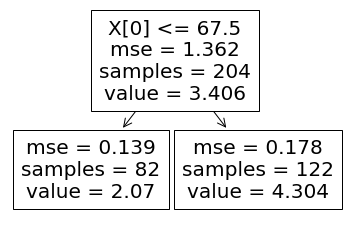

In [238]:
plot_tree(rt);

**MSE of whole training set**

In [239]:
round(((train['duration'] - train['duration'].mean())**2).mean(), 3)

1.362

**Other values in the tableau**

In [240]:
left = train[train['waiting'] <= 67.5]
print(f"""{len(left)} samples, with a mean target 
    value of {round(left['duration'].mean(), 2)}""")

82 samples, with a mean target 
    value of 2.07


In [241]:
right = train[train['waiting'] > 67.5]
print(f"""{len(right)} samples, with a mean target 
    value of {round(right['duration'].mean(), 3)}""")

122 samples, with a mean target 
    value of 4.304


In [242]:
rt.predict(left[['waiting']]).min() == rt.predict(left[['waiting']]).max()

True

In [243]:
rt.predict(left[['waiting']])[0]

2.069914634146341

In [244]:
mse_left = ((left['duration'] - left['duration'].mean())**2).mean()
round(mse_left, 3)

0.139

## Histograms of Target Values after Split

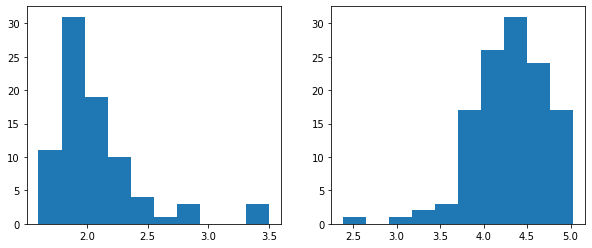

In [248]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].hist(left['duration'])
ax[1].hist(right['duration']);

## Finding the Optimal Threshold

In [175]:
X_train.min()

waiting    43
dtype: int64

In [176]:
X_train.max()

waiting    94
dtype: int64

In [214]:
thresholds = np.linspace(X_train.min()+0.5, X_train.max()-0.5, 51)

In [215]:
thresholds

array([[43.5],
       [44.5],
       [45.5],
       [46.5],
       [47.5],
       [48.5],
       [49.5],
       [50.5],
       [51.5],
       [52.5],
       [53.5],
       [54.5],
       [55.5],
       [56.5],
       [57.5],
       [58.5],
       [59.5],
       [60.5],
       [61.5],
       [62.5],
       [63.5],
       [64.5],
       [65.5],
       [66.5],
       [67.5],
       [68.5],
       [69.5],
       [70.5],
       [71.5],
       [72.5],
       [73.5],
       [74.5],
       [75.5],
       [76.5],
       [77.5],
       [78.5],
       [79.5],
       [80.5],
       [81.5],
       [82.5],
       [83.5],
       [84.5],
       [85.5],
       [86.5],
       [87.5],
       [88.5],
       [89.5],
       [90.5],
       [91.5],
       [92.5],
       [93.5]])

In [221]:
mses_weighted_sums = []
for thresh in thresholds:
    left = train[train['waiting'] <= thresh[0]]
    right = train[train['waiting'] > thresh[0]]
    mse_left = ((left['duration'] - left['duration'].mean())**2).mean()
    mse_right = ((right['duration'] - right['duration'].mean())**2).mean()
    mse_w_sum = (len(left) * mse_left + len(right) * mse_right) / len(train)
    mses_weighted_sums.append(mse_w_sum)

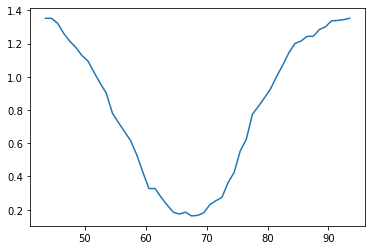

In [222]:
sns.lineplot(x=[thresh[0] for thresh in thresholds], y=mses_weighted_sums);

In [223]:
paired = dict(zip([thresh[0] for thresh in thresholds], mses_weighted_sums))

In [224]:
[k for k in paired if paired[k] == np.min(list(paired.values()))]

[67.5]